In [2]:
import os
import numpy as np #para manipulação de arrays e matrizes                
import pandas as pd #manipulação e análise de dados
import seaborn as sns #visualização de dados em alto nível
import matplotlib.pyplot as plt #para visualização de dados

In [3]:
# get absolute path
cwd = os.getcwd()

train =  pd.read_csv('C:\\Users\\arist\\OneDrive\\Documentos\\GitHub\\serasa-challenge\\data\\train_data\\train.csv')
train = train.drop(columns=['ID_code'])
feat = train.drop(columns=['target'])
label = train['target']

In [4]:
train.head(5)

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 201 entries, target to var_199
dtypes: float64(200), int64(1)
memory usage: 306.7 MB


There are no missing data

In [6]:
check_isnull = train.isnull().sum()
features_null = filter(lambda x: (x < 0), check_isnull)

print(list(features_null))

[]


The class imbalance ratio

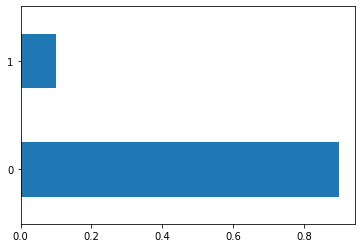

In [7]:
train.target.value_counts(normalize=True)

train.target.value_counts(normalize=True).plot.barh()
plt.show()

### Analyse correlation between variables
Due to the amount of variables, it is impossible to analyze a correlation matrix. Alternatively, this analysis will be done by analyzing the distribution of correlations between variables.

In [8]:
train.corr()['target'].sort_values(ascending=False)

target     1.000000
var_6      0.066731
var_110    0.064275
var_53     0.063399
var_26     0.062422
             ...   
var_76    -0.061917
var_146   -0.063644
var_12    -0.069489
var_139   -0.074080
var_81    -0.080917
Name: target, Length: 201, dtype: float64

Min correlation = -90.2525
Max correlation = 74.0321


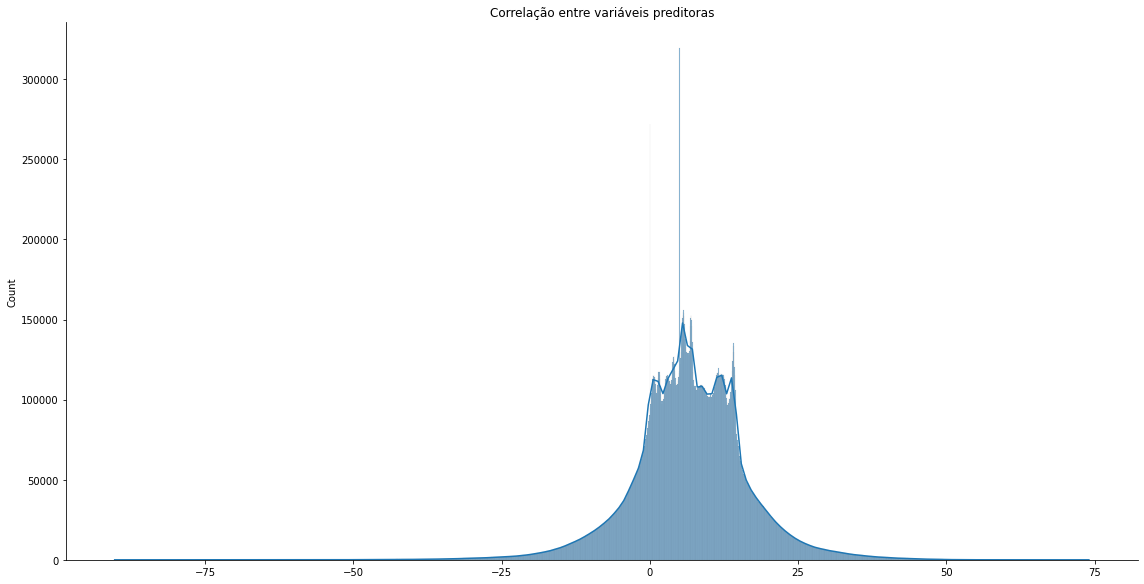

In [9]:
df_corr = train.values.flatten()
df_corr = df_corr[df_corr != 1]

print(f'Min correlation = {df_corr.min()}')
print(f'Max correlation = {df_corr.max()}')

sns.displot(data=df_corr, kde=True, height=8, aspect=2)
plt.title("Correlação entre variáveis preditoras");

There are not correlated features

All feature distributions are very similar to the normal distribution